### Uppgifter
Alla grafer ska exporteras till en undermapp som heter visualiseringar i ditt repo för labben. Exportera
matplotlib/seaborngrafer i png-format och plotly-grafer som html-filer. Ge relevanta namn till dina filer så det blir lätt att
referera till dem. Notera att du behöver ställa in bakgrundsfärg när du sparar matplotlibgrafer, annars blir de
transparenta och svåra att läsa.
Tänk på data storytelling, graferna du skapar ska ha lämpliga rubriker, labels, annoteringar, clutter ska tas bort, jobba
med attention mha färger mm

### Uppgift 0 - uppvärmning med riket
I den här uppgiften ska du visualisera med hjälp av matplotlib och/eller seaborn
  - a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena. Ändra kolumnnamnen på
       respektive dataframe så du får något liknande som nedan.
  - b) Ta reda på antalet som fått F i matematik totalt, pojkar respektive flickor.
  - c) Rita ett stapeldiagram på totala poängen för de olika ämnena.
  - d) Rita fyra olika stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen.
  - e) Rita ett stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen.
Uppgift 1 - uppvärmning betyg och prov
I uppgifterna nedan ska du använda dig av datasetet betyg_o_prov_riksnivå.xlsx. Använd Plotly för att rita diagrammen
nedan för de uppgifter som kräver diagram. Använd Pandas för att svara på frågor om datasetet.
  - a) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,
flickor och pojkar i samma graf.


In [57]:
# A)
import pandas as pd

# Läser in filen och alla olika sheets
df_riks_2023 = pd.read_excel("../Labb2/data/riket2023_åk9_np.xlsx", sheet_name=None, skiprows=8)

sheets_to_change = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk", "Rapportbeskrivning och def."]

# Funktion för att ändra kolumnnamnen i alla sheets
def change_columns(df):
    df.columns = ["Plats", "Huvudman", "Totalt (A-F)", "Flickor (A-F)", "Pojkar (A-F)", "Totalt (A-E)", "Flickor (A-E)", "Pojkar (A-E)", "Totalt (poäng)", "Flickor (poäng)", "Pojkar (poäng)"][:len(df.columns)]
    return df

# Loopar genom varje sheet och ändrar kolumnnamnen om sheetet finns med i sheets_to_change
for sheet_name, df in df_riks_2023.items():
    if sheet_name in sheets_to_change:
        df_riks_2023[sheet_name] = change_columns(df)

df_riks_2023['Matematik']


,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [58]:
# Testar så jag kan skriva ut mer än första sheetet
df_math = df_riks_2023["Matematik"]

df_math

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [59]:
# Extract number of girls with grades A-F
flickor_A_F = df_riks_2023["Matematik"].loc[0, "Flickor (A-F)"]
#Extract the percentage of girls with grades A-E and convert to a decimal
flickor_A_E = df_riks_2023["Matematik"].loc[0, "Flickor (A-E)"] / 100  
# Calculate number of girls with F by subtracting the percentage of girls with grades A to E from 1 and multiplying by the total number of girls with grades A to F
flickor_F = flickor_A_F * (1 - flickor_A_E)
rounded_flickor_F =round(flickor_F)

print("Antal flickor som fått betyget F:", rounded_flickor_F)

# Extract number of girls with grades A-F
pojkar_A_F = df_riks_2023["Matematik"].loc[0, "Pojkar (A-F)"]
#Extract the percentage of boys with grades A-E and convert to a decimal
pojkar_A_E = df_riks_2023["Matematik"].loc[0, "Pojkar (A-E)"] / 100
# Calculate number of boys with F by subtracting the percentage of boys with grades A to E from 1 and multiplying by the total number of boys with grades A to F
pojkar_F = pojkar_A_F * (1 - pojkar_A_E)
rounded_pojkar_F =round(pojkar_F)

print("Antal pojkar som fått betyget F:", rounded_pojkar_F)

Antal flickor som fått betyget F: 5825
Antal pojkar som fått betyget F: 5798


In [60]:
# B)

# Totalt antal flickor som fått F i matematik
flickor_F = (pd.to_numeric(df_riks_2023["Matematik"]['Flickor (A-F)']) * 0.113)
print("Totalt antal flickor som fått F:", round(flickor_F[0]))

# Totalt antal killar som fått F i matematik
killar_F = (pd.to_numeric(df_riks_2023["Matematik"]['Pojkar (A-F)']) * 0.105)
print("Totalt antal killar som fått F:", round(killar_F[0]))


Totalt antal flickor som fått F: 5825
Totalt antal killar som fått F: 5798


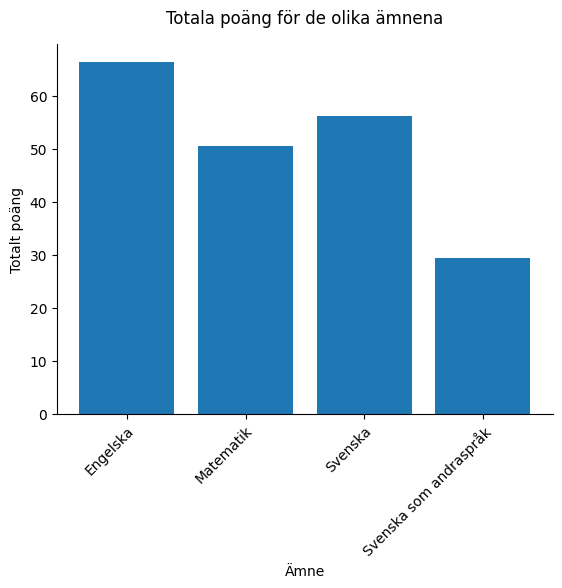

In [61]:
# C)

import matplotlib.pyplot as plt

# Loopar genom varje sheet och ändrar kolumnnamnen precis som ovan
for sheet_name, df in df_riks_2023.items():
    if sheet_name in sheets_to_change:
        df_riks_2023[sheet_name] = change_columns(df)

# Skapar en DataFrame med de totala poängen för varje ämne
df_total_points = pd.DataFrame([
    {'Ämne': sheet_name, 'Totalt poäng': pd.to_numeric(df['Totalt (poäng)'], errors='coerce').sum(axis=0)}
    for sheet_name, df in df_riks_2023.items() if sheet_name in sheets_to_change and 'Totalt (poäng)' in df.columns
])

# Rensar bort eventuella NaN-värden
df_total_points.dropna(inplace=True)

# Ritar upp ett stapeldiagram
fig, ax = plt.subplots()
ax.bar(df_total_points['Ämne'], df_total_points['Totalt poäng'])
ax.set_title('Totala poäng för de olika ämnena', pad=15)
ax.set_xlabel('Ämne')
ax.set_ylabel('Totalt poäng')

# Tar bort översta och högra axel-linjen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ändrar etiketterna på x axeln så de får plats
plt.xticks(rotation=45, ha="right", rotation_mode="anchor", fontsize=10)

plt.show()


C:\Users\Sandra\AppData\Local\Temp\ipykernel_39612\972071720.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_total_points = pd.concat([df_total_points, pd.DataFrame({'Huvudman': [huvudman], 'Ämne': [sheet_name], 'Totalt poäng': [total_points]})])
C:\Users\Sandra\AppData\Local\Temp\ipykernel_39612\972071720.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(group['Ämne'], rotation=45, ha="right", rotation_mode="anchor", fontsize=10)
C:\Users\Sandra\AppData\Local\Temp\ipykernel_39612\972071720.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.

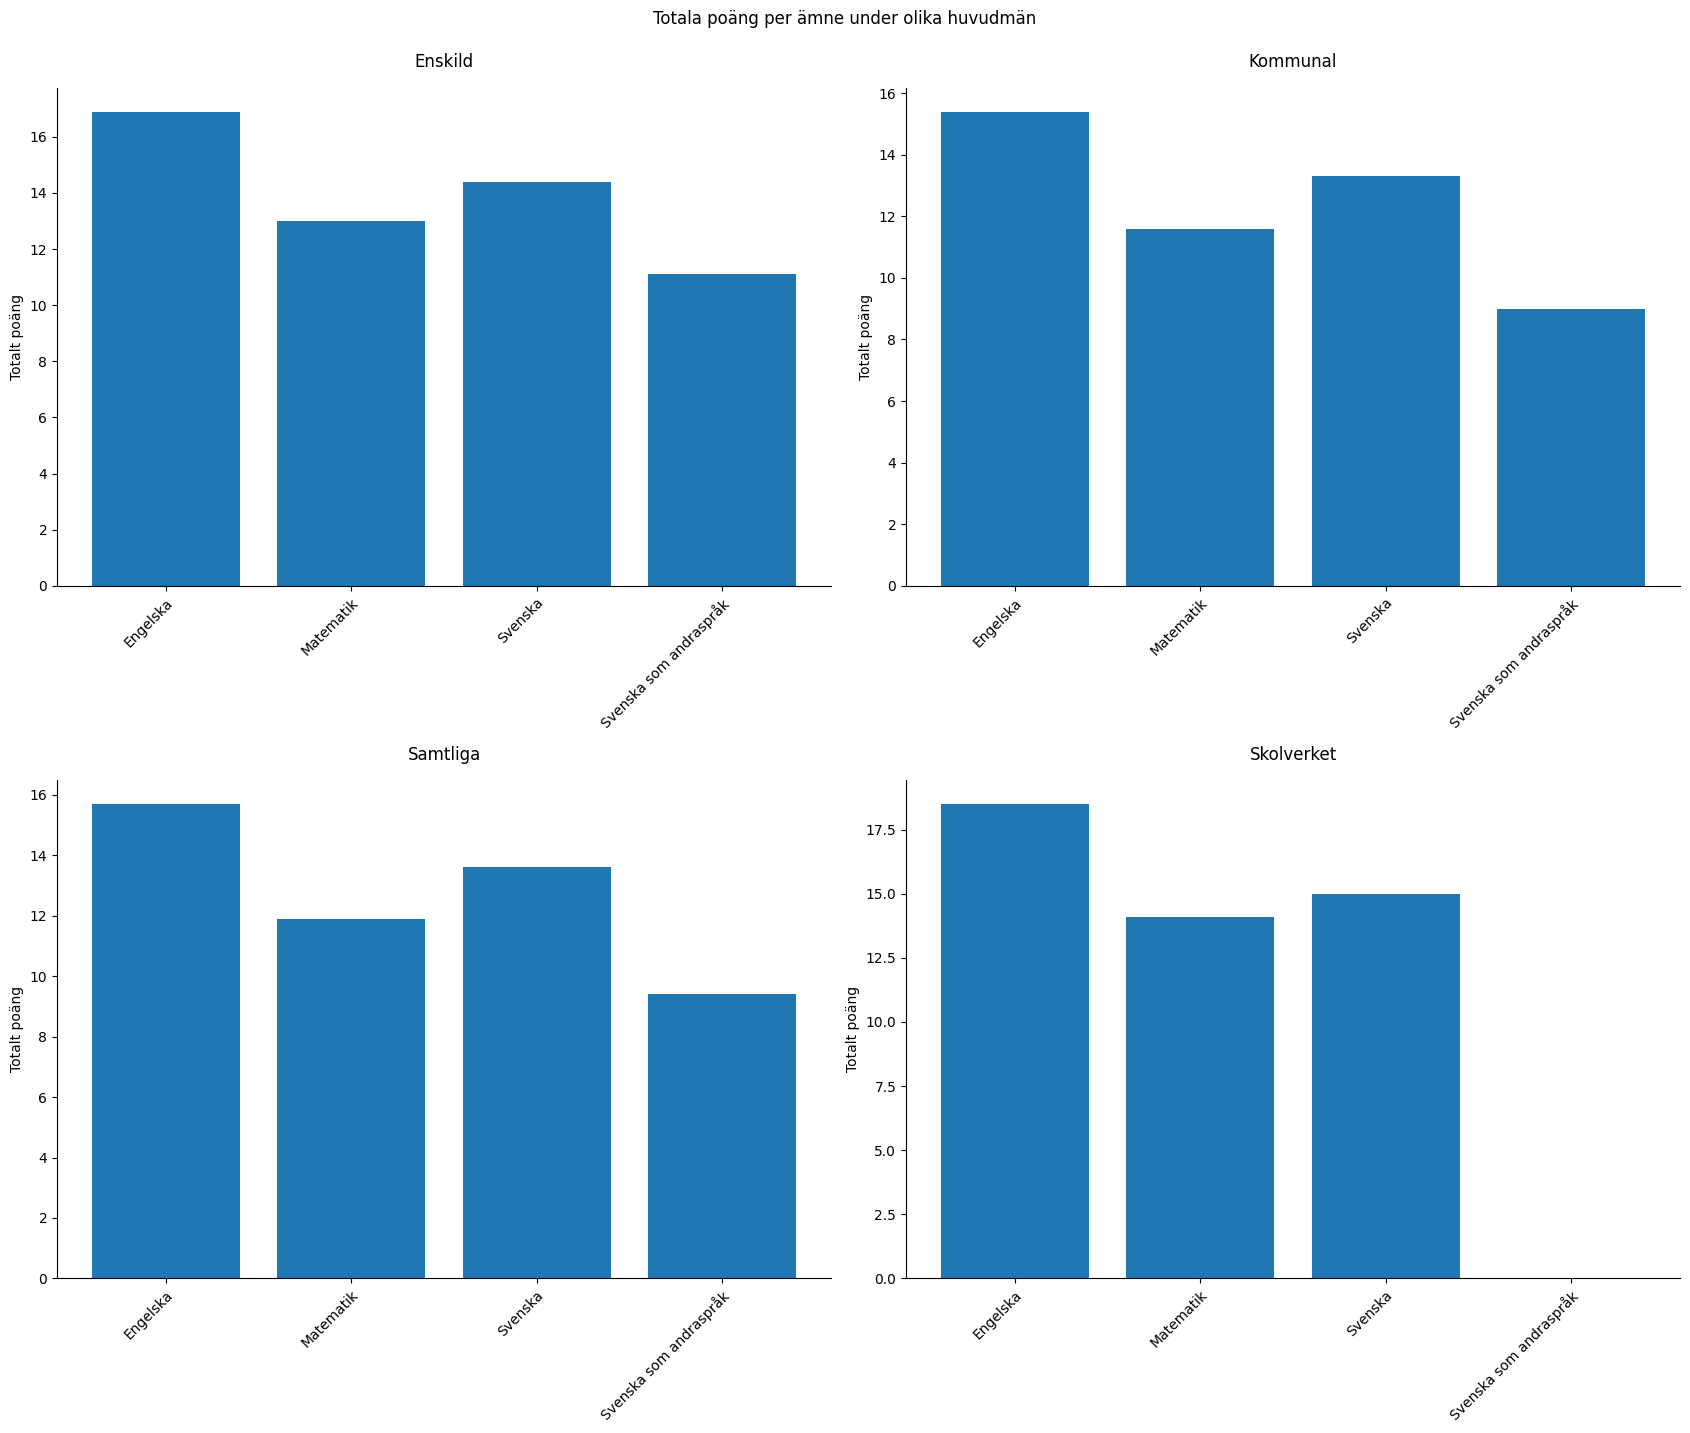

In [62]:
# D)

import matplotlib.pyplot as plt

for sheet_name, df in df_riks_2023.items():
    if sheet_name in sheets_to_change:
        df_riks_2023[sheet_name] = change_columns(df)

df_total_points = pd.DataFrame(columns=['Huvudman', 'Ämne', 'Totalt poäng'])

# Loopar genom varje sheet och hämtar den totala poängen för varje ämne och "huvudman"
for sheet_name in sheets_to_change:
    for huvudman in df_riks_2023[sheet_name]['Huvudman'].unique():
        if 'Totalt (poäng)' in df_riks_2023[sheet_name].columns:
            total_points = pd.to_numeric(df_riks_2023[sheet_name][df_riks_2023[sheet_name]['Huvudman'] == huvudman]['Totalt (poäng)'], errors='coerce').sum(axis=0)
            df_total_points = pd.concat([df_total_points, pd.DataFrame({'Huvudman': [huvudman], 'Ämne': [sheet_name], 'Totalt poäng': [total_points]})])

# Rensar bort eventuella NaN-värden
df_total_points.dropna(inplace=True)

# Skapar subplots och korrigerar storlek på "graf"
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(17, 14))

# Loopar genom varje "huvudman" och ritar ett stapeldiagram i respektive subplot-graf
for i, (huvudman, group) in enumerate(df_total_points.groupby('Huvudman')):
    ax = axs[i // 2, i % 2] 
    ax.bar(group['Ämne'], group['Totalt poäng'])
    ax.set_title(f"{huvudman}", pad=15)
    ax.set_ylabel('Totalt poäng')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Justerar x-label
    ax.set_xticklabels(group['Ämne'], rotation=45, ha="right", rotation_mode="anchor", fontsize=10)

# Justerar layouten för att undvika överlappning
plt.tight_layout()
plt.suptitle("Totala poäng per ämne under olika huvudmän", y=1.02)
plt.show()


### Uppgift 1 - uppvärmning betyg och prov
I uppgifterna nedan ska du använda dig av datasetet betyg_o_prov_riksnivå.xlsx. Använd Plotly för att rita diagrammen
nedan för de uppgifter som kräver diagram. Använd Pandas för att svara på frågor om datasetet.
  - a) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,
flickor och pojkar i samma graf.
  - b) Rita ett linjediagram för meritvärde för 16 ämnen för totalt, flickor och pojkar för läsår 18-23.
  - c) Undersök nu andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data finns för
läsår 22/23. Exempel kan man undersöka föräldrarnas utbildningsbakgrund. Rita lämpliga grafer

In [63]:
#A )

import pandas as pd

# Läser in data från båda tabellerna i betyg och prov dokumentet
df_grades_1A = pd.read_excel("../Labb2/data/betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1A")
df_grades_1B = pd.read_excel("../Labb2/data/betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B")

# Läser in rad 9-14 och 7-12 i respektive tabell. 
data_1A = df_grades_1A.iloc[9:14]
data_1B = df_grades_1B.iloc[7:12]

# Döper om kolumnerna
a_columns = [
    "Läsår",
    "Totalt som avslutat åk 9",
    "Totalt som avslutat åk 9: Flickor",
    "Totalt som avslutat åk 9: Pojkar",
    "Elever med slutbetyg: Totalt",
    "Elever med slutbetyg: Flickor",
    "Elever med slutbetyg: Pojkar",
    "Godkända slutbetyg: Totalt",
    "Godkända slutbetyg: Flickor",
    "Godkända slutbetyg: Pojkar"
]

b_columns = [
    "Läsår",
    "Medelvärde 16 ämnen: Totalt",
    "Medelvärde 16 ämnen: Flickor",
    "Medelvärde 16 ämnen: Pojkar",
    "Medelvärde 17 ämnen: Totalt",
    "Medelvärde 17 ämnen: Flickor",
    "Medelvärde 17 ämnen: Pojkar",
    "% Som saknar godkänt: Totalt",
    "% Som saknar godkänt: Flickor",
    "% Som saknar godkänt: Pojkar"
]

data_1A.columns = a_columns
data_1B.columns = b_columns

display(data_1A)
display(data_1B)

,Läsår,Totalt som avslutat åk 9,Totalt som avslutat åk 9: Flickor,Totalt som avslutat åk 9: Pojkar,Elever med slutbetyg: Totalt,Elever med slutbetyg: Flickor,Elever med slutbetyg: Pojkar,Godkända slutbetyg: Totalt,Godkända slutbetyg: Flickor,Godkända slutbetyg: Pojkar
9,2018/19,112731,54667,58064,112280,54430,57850,110663,53757,56906
10,2019/20,115023,55670,59353,114444,55389,59055,112728,54711,58017
11,2020/21,116359,56715,59644,115710,56394,59316,114136,55721,58415
12,2021/22,120525,58513,62012,119891,58207,61684,117935,57312,60623
13,2022/23,121369,59043,62326,120742,58703,62039,118736,57781,60955


,Läsår,Medelvärde 16 ämnen: Totalt,Medelvärde 16 ämnen: Flickor,Medelvärde 16 ämnen: Pojkar,Medelvärde 17 ämnen: Totalt,Medelvärde 17 ämnen: Flickor,Medelvärde 17 ämnen: Pojkar,% Som saknar godkänt: Totalt,% Som saknar godkänt: Flickor,% Som saknar godkänt: Pojkar
7,2018/19,221.7,234.3,209.8,229.8,243.3,217,24.5,21.7,27.2
8,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
9,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
10,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
11,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28


In [64]:
# A) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,
#flickor och pojkar i samma graf.

# Totalt antal som fått F i respektive "avdelning"
Total_F = (data_1A['Totalt som avslutat åk 9'] - data_1A["Godkända slutbetyg: Totalt"])
print("Totalt antal som saknar godkänt:\n", round(Total_F))

Flickor_F_grade = (data_1A['Totalt som avslutat åk 9: Flickor'] - data_1A["Godkända slutbetyg: Flickor"])
print("Totalt antal flickor som saknar godkänt:\n", round(Flickor_F_grade))

Pojkar_F_grade = (data_1A['Totalt som avslutat åk 9: Pojkar'] - data_1A["Godkända slutbetyg: Pojkar"])
print("Totalt antal pojkar som saknar godkänt:\n", round(Pojkar_F_grade))



Totalt antal som saknar godkänt:
 9     2068
10    2295
11    2223
12    2590
13    2633
dtype: object
Totalt antal flickor som saknar godkänt:
 9      910
10     959
11     994
12    1201
13    1262
dtype: object
Totalt antal pojkar som saknar godkänt:
 9     1158
10    1336
11    1229
12    1389
13    1371
dtype: object


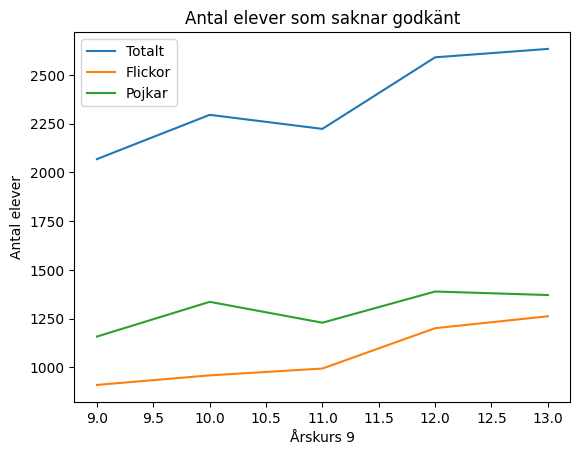

In [65]:
# A)

# Beräknar antal elever som saknar godkänt eller slutbetyg
Total_F = (data_1A['Totalt som avslutat åk 9'] - data_1A["Godkända slutbetyg: Totalt"])
Flickor_F_grade = (data_1A['Totalt som avslutat åk 9: Flickor'] - data_1A["Godkända slutbetyg: Flickor"])
Pojkar_F_grade = (data_1A['Totalt som avslutat åk 9: Pojkar'] - data_1A["Godkända slutbetyg: Pojkar"])

# Ritar upp linjediagramet
plt.plot(Total_F, label='Totalt')
plt.plot(Flickor_F_grade, label='Flickor')
plt.plot(Pojkar_F_grade, label='Pojkar')

# Justerar etiketterna
plt.title('Antal elever som saknar godkänt')
plt.xlabel('Årskurs 9')
plt.ylabel('Antal elever')
plt.legend()

plt.show()


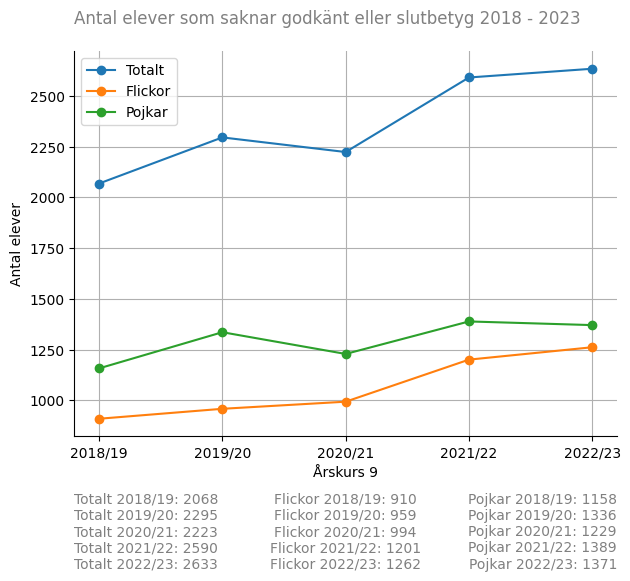

In [66]:
# A)

# Variabel för årskurser
years = data_1A['Läsår']

# Beräknar antal elever som saknar godkänt och slutbetyg, samma som ovan
Total_F = (data_1A['Totalt som avslutat åk 9'] - data_1A["Godkända slutbetyg: Totalt"])
Flickor_F_grade = (data_1A['Totalt som avslutat åk 9: Flickor'] - data_1A["Godkända slutbetyg: Flickor"])
Pojkar_F_grade = (data_1A['Totalt som avslutat åk 9: Pojkar'] - data_1A["Godkända slutbetyg: Pojkar"])

# Skapar subplots och storlek på fig
fig, ax = plt.subplots(figsize=(7, 5))

# Ritar linjediagramet med punkter som markerar varje år
plt.plot(years, Total_F, label='Totalt', marker='o')
plt.plot(years, Flickor_F_grade, label='Flickor', marker='o')
plt.plot(years, Pojkar_F_grade, label='Pojkar', marker='o')

# Justerar etiketterna och skapar luft mellan toppetikett och graf, och vänsterplacerar topptexten
plt.title('Antal elever som saknar godkänt eller slutbetyg 2018 - 2023', pad=20, color="gray", loc="left")
plt.xlabel('Årskurs 9')
plt.ylabel('Antal elever')

# Ger grafen ett rutnät
plt.grid(True)
plt.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Lägger till tre listor med år, vem och "summa" under grafen för extra tydlighet
plt.text(0.0, -0.35, '\n'.join([f'Totalt {year}: {round(val)}' for val, year in zip(Total_F, years)]), transform=plt.gca().transAxes, ha='left', va='bottom', color='gray')
plt.text(0.5, -0.35, '\n'.join([f'Flickor {year}: {round(val)}' for val, year in zip(Flickor_F_grade, years)]), transform=plt.gca().transAxes, ha='center', va='bottom', color='gray')
plt.text(1.0, -0.35, '\n'.join([f'Pojkar {year}: {round(val)}' for val, year in zip(Pojkar_F_grade, years)]), transform=plt.gca().transAxes, ha='right', va='bottom', color='gray')

plt.show()


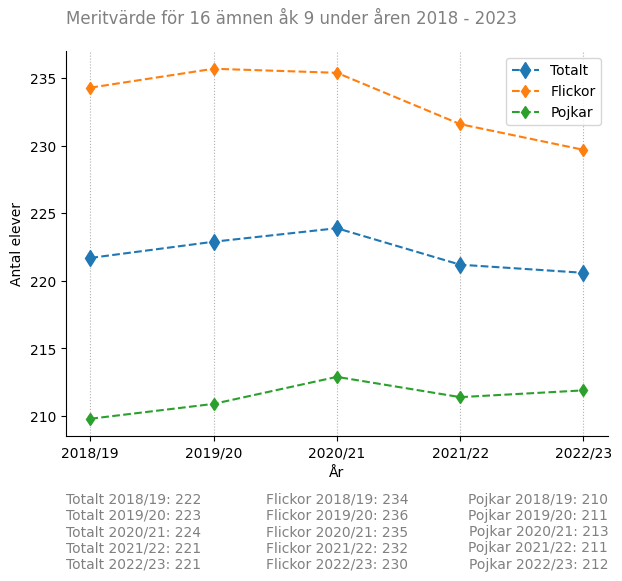

In [67]:
# B) Rita ett linjediagram för meritvärde för 16 ämnen för totalt, flickor och pojkar för läsår 18-23.

# Variabel för årskurser
years = data_1B["Läsår"]

# Beräknar antal elever som saknar godkänt och slutbetyg, samma som ovan
Mean_T = (data_1B["Medelvärde 16 ämnen: Totalt"])
Mean_F = (data_1B["Medelvärde 16 ämnen: Flickor"])
Mean_P = (data_1B["Medelvärde 16 ämnen: Pojkar"])

# Skapar subplots och storlek på fig
fig, ax = plt.subplots(figsize=(7, 5))

# Ritar linjediagramet med punkter som markerar varje år
plt.plot(years, Mean_T, label="Totalt", marker="d", ms=8, ls="--")
plt.plot(years, Mean_F, label="Flickor", marker="d", ls="--")
plt.plot(years, Mean_P, label="Pojkar", marker="d", ls="--")

# Justerar etiketterna och skapar luft mellan toppetikett och graf, och vänsterplacerar topptexten
plt.title("Meritvärde för 16 ämnen åk 9 under åren 2018 - 2023", pad=20, color="gray", loc="left")
plt.xlabel("År")
plt.ylabel("Antal elever")

# Ger grafen ett rutnät
plt.grid(axis= "x", ls = ':', linewidth = 0.8)
plt.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Lägger till tre listor med år, vem och "summa" under grafen för extra tydlighet                 # Get current axis - för text och gör om så man kan ändra dem
plt.text(0.0, -0.35, '\n'.join([f'Totalt {year}: {round(val)}' for val, year in zip(Mean_T, years)]), transform=plt.gca().transAxes, ha='left', va='bottom', color='gray')
plt.text(0.5, -0.35, '\n'.join([f'Flickor {year}: {round(val)}' for val, year in zip(Mean_F, years)]), transform=plt.gca().transAxes, ha='center', va='bottom', color='gray')
plt.text(1.0, -0.35, '\n'.join([f'Pojkar {year}: {round(val)}' for val, year in zip(Mean_P, years)]), transform=plt.gca().transAxes, ha='right', va='bottom', color='gray')

plt.show()


In [68]:
# C) Undersök nu andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data finns för
# läsår 22/23. Exempel kan man undersöka föräldrarnas utbildningsbakgrund. Rita lämpliga grafer

data_parents = df_grades_1B.iloc[29:32]

# Döper om kolumnerna

b2_columns = [
    "Läsår",
    "Medelvärde 16 ämnen: Totalt",
    "Medelvärde 16 ämnen: Flickor",
    "Medelvärde 16 ämnen: Pojkar",
    "Medelvärde 17 ämnen: Totalt",
    "Medelvärde 17 ämnen: Flickor",
    "Medelvärde 17 ämnen: Pojkar",
    "% Som saknar godkänt: Totalt",
    "% Som saknar godkänt: Flickor",
    "% Som saknar godkänt: Pojkar"
]
data_parents.columns = b2_columns

# Display DataFrame
display(data_parents)


,Läsår,Medelvärde 16 ämnen: Totalt,Medelvärde 16 ämnen: Flickor,Medelvärde 16 ämnen: Pojkar,Medelvärde 17 ämnen: Totalt,Medelvärde 17 ämnen: Flickor,Medelvärde 17 ämnen: Pojkar,% Som saknar godkänt: Totalt,% Som saknar godkänt: Flickor,% Som saknar godkänt: Pojkar
29,Förgymnasial utbildning,163.8,172.2,155.8,166.8,175.6,158.3,63.5,61.5,65.3
30,Gymnasial utbildning,197.4,207.2,188.2,203.2,213.6,193.3,37.4,35.2,39.5
31,Eftergymnasial utbildning,239.1,247.9,230.7,248.6,258.1,239.6,16.8,16.1,17.5


In [88]:
# C)

# Beräknar meritvärden för varje kön
Parents_T = data_parents["Medelvärde 16 ämnen: Totalt"]
Parents_F = data_parents["Medelvärde 16 ämnen: Flickor"]
Parents_P = data_parents["Medelvärde 16 ämnen: Pojkar"]

print(Parents_T)
print(Parents_F)
print(Parents_P)

29    163.8
30    197.4
31    239.1
Name: Medelvärde 16 ämnen: Totalt, dtype: object
29    172.2
30    207.2
31    247.9
Name: Medelvärde 16 ämnen: Flickor, dtype: object
29    155.8
30    188.2
31    230.7
Name: Medelvärde 16 ämnen: Pojkar, dtype: object


In [70]:
# C)
# Konverterar kolumner till numeriska värden
Parents_T_numeric = pd.to_numeric(Parents_T)
Parents_F_numeric = pd.to_numeric(Parents_F)
Parents_P_numeric = pd.to_numeric(Parents_P)

print(Parents_T_numeric)
print(Parents_F_numeric)
print(Parents_P_numeric)

29    163.8
30    197.4
31    239.1
Name: Medelvärde 16 ämnen: Totalt, dtype: float64
29    172.2
30    207.2
31    247.9
Name: Medelvärde 16 ämnen: Flickor, dtype: float64
29    155.8
30    188.2
31    230.7
Name: Medelvärde 16 ämnen: Pojkar, dtype: float64


In [71]:
# C)
import numpy as np
# Skapar subplots och storlek på grafen
#fig, ax = plt.subplots(figsize=(12, 6))

# Bredden på varje stapel
bar_width = 0.2

# Skapa listor för x-koordinaterna
x_values_totalt = np.arange(len(Parents_T_numeric))
x_values_flickor = x_values_totalt + bar_width
x_values_pojkar = x_values_totalt + 2 * bar_width

print(x_values_totalt)
print(x_values_flickor)
print(x_values_pojkar)

[0 1 2]
[0.2 1.2 2.2]
[0.4 1.4 2.4]


<BarContainer object of 3 artists>

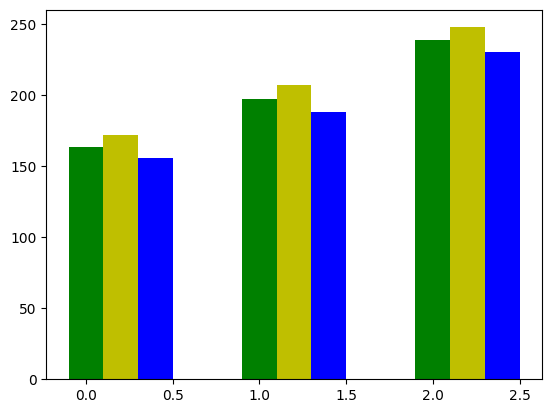

In [72]:
# C)
# Ritar stapeldiagram för varje kön och utbildningsnivå med de konverterade numeriska värdena
plt.bar(x_values_totalt, Parents_T_numeric, label="Meritvärde: Totalt", color="g", width=bar_width)
plt.bar(x_values_flickor, Parents_F_numeric, label="Meritvärde: Flickor", color="y", width=bar_width)
plt.bar(x_values_pojkar, Parents_P_numeric, label="Meritvärde: Pojkar", color="b", width=bar_width)

In [73]:
# C)
print(data_parents.index)

RangeIndex(start=29, stop=32, step=1)


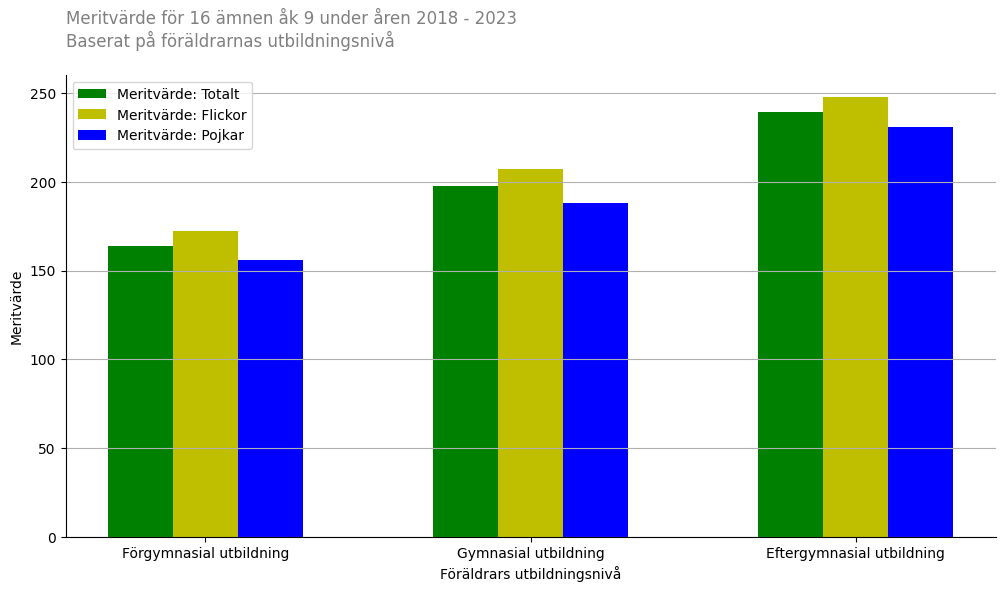

In [89]:
# C)
# Skapar subplots och storlek på grafen
fig, ax = plt.subplots(figsize=(12, 6))

# Bredden på varje stapel
bar_width = 0.2

# Skapa listor för x-koordinaterna
x_values_totalt = np.arange(len(Parents_T_numeric))
x_values_flickor = x_values_totalt + bar_width
x_values_pojkar = x_values_totalt + 2 * bar_width

# Ritar stapeldiagram för varje kön och utbildningsnivå med de konverterade numeriska värdena
plt.bar(x_values_totalt, Parents_T_numeric, label="Meritvärde: Totalt", color="g", width=bar_width)
plt.bar(x_values_flickor, Parents_F_numeric, label="Meritvärde: Flickor", color="y", width=bar_width)
plt.bar(x_values_pojkar, Parents_P_numeric, label="Meritvärde: Pojkar", color="b", width=bar_width)

# Justerar etiketterna och skapar luft mellan toppetikett och graf, och vänsterplacerar topptexten
plt.title("Meritvärde för 16 ämnen åk 9 under åren 2018 - 2023\nBaserat på föräldrarnas utbildningsnivå", pad=20, color="gray", loc="left")
plt.xlabel("Föräldrars utbildningsnivå")
plt.ylabel("Meritvärde")

# Använd år som x-axel tick positions
group_labels = ["Förgymnasial utbildning", "Gymnasial utbildning", "Eftergymnasial utbildning"]
plt.xticks(x_values_totalt + bar_width, group_labels)

# Ger grafen ett rutnät
plt.grid(axis="y")
plt.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


### Uppgift 2 - KPIer & EDA
Definiera 3-6 KPIer utöver de som använts i ovanstående uppgifter och gör explorativ dataanalys på en eller flera
dataset som ni får söka själva. Ni får inte ta dataseten som ni redan jobbat med i uppgift 0 och 1. Excel och eller csv-filer
kan ni hitta i skolverkets statistik
Se till att dokumentera vad du undersöker med markdown kombinerad med kod i Jupyter notebook eller om du
använder Pythonskript, skriv en markdown vid sidan om. Dokumentera också vad du kommer fram till och spara alla
visualiseringar.

    - Andel elever med minst ett saknat betyg:
        - (Antal elever med minst ett saknat betyg / Totalt antal elever) * 100
        - Ger andelen elever som inte uppnår ett godkänt betyg i minst ett ämne.

    - Genomsnittligt meritvärde för elever med föräldrar som jobbar inom skola:
        - Genomsnittligt meritvärde för elever vars föräldrar arbetar inom skolverket.
        - Kan indikera om det finns något sammanhang mellan föräldrarnas yrke och elevernas prestationer.

    - Andel flickor med minst ett saknat betyg:
        - (Antal flickor med minst ett saknat betyg / Totalt antal flickor) * 100
        - Ger insikt i andelen flickor som har svårigheter att uppnå godkänt betyg i minst ett ämne.

    - Andel elever som går vidare till högre utbildning:
        - (Antal elever som går vidare till högre utbildning / Totalt antal elever som tog examen) * 100
        - Mäter skolans framgång i att förbereda elever för fortsatta studier.

    - Andel elever som uppnår nationella standarder i alla ämnen:
        - Beräkning: (Antal elever som uppnår nationella standarder i alla ämnen / Totalt antal elever) * 100
        - Syfte: Ger en indikation på skolans framgång i att uppfylla nationella akademiska standarder.

    - Andel elever med förbättrat meritvärde från föregående år:
        - Beräkning: (Antal elever med ökat meritvärde från föregående år / Totalt antal elever) * 100
        - Syfte: Mäter elevernas akademiska framsteg över tiden.

### Gymnasieskola - Riksnivå - Relationen mellan prov och betyg - VT22 och VT23 för att jämföra

eller 

### Gymnasieskola - Riksnivå - Betyg - Jämförelse av betygsresultat över tid 2022/2023

In [91]:
gymnasie_vt23 = pd.read_excel("../Labb2/data/Gymnasieskola_kursbetyg_o_kursprovsbetyg_VT23_Riket.xlsx", sheet_name=None, skiprows=8)
gymnasie_vt22 = pd.read_excel("../Labb2/data/Gymnasieskola_kursbetyg_o_kursprovsbetyg_VT22_Riket.xlsx", sheet_name=None, skiprows=8)

sheets_to_change2 = ["Engelska 5", "Engelska 6", "Matematik 1A", "Matematik 1B", "Matematik 2B", "Matematik 3B", "Matematik 3C", "Matematik 4", "Svenska 1", "Svenska 3", "Svenska som andraspråk 1", "Svenska som andraspråk 3", "Rapportbeskrivning och def."]

# Funktion för att ändra kolumnnamnen i alla sheets
def change_columns(df2):
    df2.columns = ["Riket", "Huvudman", "Antal elever som har både provbetyg och kursbetyg", "Andel lägre: ", "Andel lika", "Andel högre", "Antal kvinnor", "Andel lägre kvinnor", "Andel lika kvinnor", "Andel högre kvinnor", "Antal män", "Andel lägre män", "Andel lika män", "Andel högre män"][:len(df2.columns)]
    return df2

# Loopar genom varje sheet och ändrar kolumnnamnen om sheetet finns med i sheets_to_change
for sheet_name, df2 in gymnasie_vt23.items():
    if sheet_name in sheets_to_change2:
        gymnasie_vt23[sheet_name] = change_columns(df2)

for sheet_name, df2 in gymnasie_vt22.items():
    if sheet_name in sheets_to_change2:
        gymnasie_vt22[sheet_name] = change_columns(df2)

print("Antal elever: Antal elever som har både provbetyg och kursbetyg\nAndel lägre: Lägre betyder att kursbetyget är ett eller flera betygssteg under provbetyget\nAndel lika: Lika, ingen avvikelse, betyder att eleven har fått samma kursbetyg som provbetyg"
      "\nAndel högre: Högre betyder att kursbetyget är ett eller flera betygssteg över provbetyget\nAntal kvinnor: Antal kvinnliga elever som har både provbetyg och kursbetyg\nAntal män: Antal manliga elever som har både provbetyg och kursbetyg")
display(gymnasie_vt23["Engelska 5"])
display(gymnasie_vt22["Engelska 5"])

gymnasie_betyg_22_23 = pd.read_excel("../Labb2/data/Gymnasieskola_Jämförelse_betygsresultat_över_tid_2023_Riket.xlsx", sheet_name=None, skiprows=8)

sheets_to_change3 = ["Nationella program", "Högskoleförberedande program", "Yrkesprogram", "Barn- och fritidsprogrammet", "Bygg- och anläggningsprogrammet", "Ekonomiprogrammet", "El- och energiprogrammet", "Estetiska programmet", "Fordons- och transportprogrammet", "Handels- och administrationsprogrammet", "Hantverksprogrammet", "Hotell- och turismprogrammet", "Humanistiska programmet", "Industritekniska programmet", "Naturbruksprogrammet", "Naturvetenskapsprogrammet", "Restaurang- och livsmedelsprogrammet", "Riksrekryterande utbildningar", "Samhällsvetenskapsprogrammet", "Teknikprogrammet", "VVS- och fastighetsprogrammet", "Vård- och omsorgsprogrammet", "Rapportbeskrivning och def."]

# Funktion för att ändra kolumnnamnen i alla sheets
def change_columns(df3):
    df3.columns = ["Riket", "Huvudman", "Betygsresultat", "22/23 ", "21/22", "20/21", "19/20", "18/19", "17/18", "16/17", "15/16", "14/15", "13/14"][:len(df3.columns)]
    return df3

# Loopar genom varje sheet och ändrar kolumnnamnen om sheetet finns med i sheets_to_change
for sheet_name, df3 in gymnasie_vt23.items():
    if sheet_name in sheets_to_change3:
        gymnasie_vt23[sheet_name] = change_columns(df3)

display(gymnasie_betyg_22_23)

Antal elever: Antal elever som har både provbetyg och kursbetyg
Andel lägre: Lägre betyder att kursbetyget är ett eller flera betygssteg under provbetyget
Andel lika: Lika, ingen avvikelse, betyder att eleven har fått samma kursbetyg som provbetyg
Andel högre: Högre betyder att kursbetyget är ett eller flera betygssteg över provbetyget
Antal kvinnor: Antal kvinnliga elever som har både provbetyg och kursbetyg
Antal män: Antal manliga elever som har både provbetyg och kursbetyg


,Riket,Huvudman,Antal elever som har både provbetyg och kursbetyg,Andel lägre:,Andel lika,Andel högre,Antal kvinnor,Andel lägre kvinnor,Andel lika kvinnor,Andel högre kvinnor,Antal män,Andel lägre män,Andel lika män,Andel högre män
0,Riket,Samtliga,23197,10.6,73.8,15.6,9100,7.4,73.9,18.7,14097,12.6,73.7,13.6
1,Riket,Kommunal,15451,11.2,74.3,14.5,5768,8.0,74.5,17.5,9683,13.1,74.2,12.7
2,Riket,Enskild,7336,9.4,72.3,18.3,3094,6.3,72.3,21.3,4242,11.6,72.3,16.1
3,Riket,Region,410,9.5,79.8,10.7,238,7.1,78.6,14.3,172,12.8,81.4,5.8


,Riket,Huvudman,Antal elever som har både provbetyg och kursbetyg,Andel lägre:,Andel lika,Andel högre,Antal kvinnor,Andel lägre kvinnor,Andel lika kvinnor,Andel högre kvinnor,Antal män,Andel lägre män,Andel lika män,Andel högre män
0,Riket,Samtliga,22813,11.5,69.7,18.8,8941,8.1,69.1,22.7,13872,13.7,70.0,16.3
1,Riket,Kommunal,14920,11.4,71.9,16.7,5485,7.8,71.3,20.8,9435,13.4,72.3,14.3
2,Riket,Enskild,7501,12.1,65.0,22.9,3217,8.9,65.3,25.7,4284,14.5,64.7,20.8
3,Riket,Region,392,5.9,72.4,21.7,239,4.6,69.9,25.5,153,7.8,76.5,15.7


{'Nationella program':     Riket  Samtliga          Antal elever med gymnasieexamen    87585  \
 0   Riket  Samtliga                - varav andel (%) kvinnor     50.0   
 1   Riket  Samtliga      - varav andel (%) med utl. bakgrund     21.2   
 2   Riket  Samtliga                Genomsnittlig betygspoäng     14.5   
 3   Riket  Samtliga  Andel (%) elever behöriga till högskola     72.2   
 4   Riket  Kommunal          Antal elever med gymnasieexamen  59193.0   
 5   Riket  Kommunal                - varav andel (%) kvinnor     49.3   
 6   Riket  Kommunal      - varav andel (%) med utl. bakgrund     18.4   
 7   Riket  Kommunal                Genomsnittlig betygspoäng     14.4   
 8   Riket  Kommunal  Andel (%) elever behöriga till högskola     71.3   
 9   Riket   Enskild          Antal elever med gymnasieexamen  27856.0   
 10  Riket   Enskild                - varav andel (%) kvinnor     51.3   
 11  Riket   Enskild      - varav andel (%) med utl. bakgrund     27.5   
 12  Riket   Ens

In [92]:
gymnasie_betyg_22_23 = pd.read_excel("../Labb2/data/Gymnasieskola_Jämförelse_betygsresultat_över_tid_2023_Riket.xlsx", sheet_name=None, skiprows=8)

sheets_to_change2 = ["Nationella program", "Högskoleförberedande program", "Yrkesprogram", "Barn- och fritidsprogrammet", "Bygg- och anläggningsprogrammet", "Ekonomiprogrammet", "El- och energiprogrammet", "Estetiska programmet", "Fordons- och transportprogrammet", "Handels- och administrationsprogrammet", "Hantverksprogrammet", "Hotell- och turismprogrammet", "Humanistiska programmet", "Industritekniska programmet", "Naturbruksprogrammet", "Naturvetenskapsprogrammet", "Restaurang- och livsmedelsprogrammet", "Riksrekryterande utbildningar", "Samhällsvetenskapsprogrammet", "Teknikprogrammet", "VVS- och fastighetsprogrammet", "Vård- och omsorgsprogrammet", "Rapportbeskrivning och def."]

# Funktion för att ändra kolumnnamnen i alla sheets
def change_columns(df3):
    df3.columns = ["Riket", "Huvudman", "Betygsresultat", "22/23 ", "21/22", "20/21", "19/20", "18/19", "17/18", "16/17", "15/16", "14/15", "13/14"][:len(df3.columns)]
    return df3

# Loopar genom varje sheet och ändrar kolumnnamnen om sheetet finns med i sheets_to_change
for sheet_name, df2 in gymnasie_vt23.items():
    if sheet_name in sheets_to_change2:
        gymnasie_vt23[sheet_name] = change_columns(df2)

display(gymnasie_betyg_22_23)

{'Nationella program':     Riket  Samtliga          Antal elever med gymnasieexamen    87585  \
 0   Riket  Samtliga                - varav andel (%) kvinnor     50.0   
 1   Riket  Samtliga      - varav andel (%) med utl. bakgrund     21.2   
 2   Riket  Samtliga                Genomsnittlig betygspoäng     14.5   
 3   Riket  Samtliga  Andel (%) elever behöriga till högskola     72.2   
 4   Riket  Kommunal          Antal elever med gymnasieexamen  59193.0   
 5   Riket  Kommunal                - varav andel (%) kvinnor     49.3   
 6   Riket  Kommunal      - varav andel (%) med utl. bakgrund     18.4   
 7   Riket  Kommunal                Genomsnittlig betygspoäng     14.4   
 8   Riket  Kommunal  Andel (%) elever behöriga till högskola     71.3   
 9   Riket   Enskild          Antal elever med gymnasieexamen  27856.0   
 10  Riket   Enskild                - varav andel (%) kvinnor     51.3   
 11  Riket   Enskild      - varav andel (%) med utl. bakgrund     27.5   
 12  Riket   Ens